In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
base_path="/content/drive/MyDrive/Colab Notebooks/CRS"
domain_lastfm = "conv_rec_sys_lastfm" # conv_rec_sys conv_rec_sys_amazon conv_rec_sys_lastfm
domain_yelp = "conv_rec_sys"
domain_amazon = "conv_rec_sys_amazon"

In [3]:
k = 10 # number of recommended items in traditional setting

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt

def group_barplot(popular_data, unpopular_data, ylabel, title, xlabel="Datasets"):
  # data for the bar plots
  x_labels = ['Yelp', 'Lastfm', 'Amazon'] # labels for the x axis

  # set the width of the bars
  bar_width = 0.35

  # create the figure
  fig, ax = plt.subplots()

  # create the bar plots
  popular_bars = ax.bar(np.arange(len(popular_data)), popular_data, bar_width, label='Popular')
  unpopular_bars = ax.bar(np.arange(len(unpopular_data)) + bar_width, unpopular_data, bar_width, label='Unpopular')

  # add labels, titles, and axis ticks
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  ax.set_xticks(np.arange(len(x_labels)))
  ax.set_xticklabels(x_labels)
  ax.legend()

  # show the plot
  plt.show()

In [6]:
import matplotlib.pyplot as plt

def generate_bar_plot(data, title, labels, xlabel, ylabel):
  plt.figure(figsize=(3, 3))

  # Create a bar plot of the data
  plt.bar(labels, data, width=0.4)

  # Add a title and axis labels
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  # Display the plot
  plt.show()

# Reading Item and User groups

In [7]:
popular_items_yelp = []
with open(f"{base_path}/{domain_yelp}/data/popular_items.txt", 'r') as popular_items_file:
    popular_items_file.readline()
    for line in popular_items_file:
        popular_items_yelp.append(line.strip())

popular_items_lastfm = []
with open(f"{base_path}/{domain_lastfm}/data/popular_items.txt", 'r') as popular_items_file:
    popular_items_file.readline()
    for line in popular_items_file:
        popular_items_lastfm.append(line.strip())

popular_items_amazon = []
with open(f"{base_path}/{domain_amazon}/data/popular_items.txt", 'r') as popular_items_file:
    popular_items_file.readline()
    for line in popular_items_file:
        popular_items_amazon.append(line.strip())

In [8]:
best_seller_yelp = []
with open(f"{base_path}/{domain_yelp}/data/active_users.txt") as bs:
  bs.readline()
  for line in bs:
    best_seller_yelp.append(line.strip())

best_seller_lastfm = []
with open(f"{base_path}/{domain_lastfm}/data/active_users.txt") as bs:
  bs.readline()
  for line in bs:
    best_seller_lastfm.append(line.strip())

best_seller_amazon = []
with open(f"{base_path}/{domain_amazon}/data/active_users.txt") as bs:
  bs.readline()
  for line in bs:
    best_seller_amazon.append(line.strip())

In [9]:
niche_yelp = []
with open(f"{base_path}/{domain_yelp}/data/inactive_users.txt") as ni:
  ni.readline()
  for line in ni:
    niche_yelp.append(line.strip())

niche_lastfm = []
with open(f"{base_path}/{domain_lastfm}/data/inactive_users.txt") as ni:
  ni.readline()
  for line in ni:
    niche_lastfm.append(line.strip())

niche_amazon = []
with open(f"{base_path}/{domain_amazon}/data/inactive_users.txt") as ni:
  ni.readline()
  for line in ni:
    niche_amazon.append(line.strip())

In [10]:
diverse_yelp = []
with open(f"{base_path}/{domain_yelp}/data/medium_users.txt") as di:
  di.readline()
  for line in di:
    diverse_yelp.append(line.strip())

diverse_lastfm = []
with open(f"{base_path}/{domain_lastfm}/data/medium_users.txt") as di:
  di.readline()
  for line in di:
    diverse_lastfm.append(line.strip())

diverse_amazon = []
with open(f"{base_path}/{domain_amazon}/data/medium_users.txt") as di:
  di.readline()
  for line in di:
    diverse_amazon.append(line.strip())

# Reading results

In [11]:
conv_results_yelp = pd.read_csv(f"{base_path}/{domain_yelp}/data/final_results.csv")
conv_results_lastfm = pd.read_csv(f"{base_path}/{domain_lastfm}/data/final_results.csv")
conv_results_amazon = pd.read_csv(f"{base_path}/{domain_amazon}/data/final_results.csv")

In [12]:
conv_results_yelp

,user_id,business_id,candidate_list,recommended_list,turn_count
0,---1lKK3aKOuomHnwAkAow,yp2nRId4v-bDtrYl5A3F-g,"['YOZgLDLNLAe2nP1sw5inYw', 'Vs7gc9EE3k9wARuUcN...","['YOZgLDLNLAe2nP1sw5inYw', 'Vs7gc9EE3k9wARuUcN...",6
1,---1lKK3aKOuomHnwAkAow,CWNMLT-ppaUjLMmrnYDPVg,"['Wxxvi3LZbHNIDwJ-ZimtnA', 'CWNMLT-ppaUjLMmrnY...","['Wxxvi3LZbHNIDwJ-ZimtnA', 'CWNMLT-ppaUjLMmrnY...",7
2,--2HUmLkcNHZp0xw6AMBPg,LR_99E7tVUfxqemvcGkDzw,"['AOuutv1P01CW07qmzpj9vA', 'LR_99E7tVUfxqemvcG...","['AOuutv1P01CW07qmzpj9vA', 'LR_99E7tVUfxqemvcG...",6
3,--2HUmLkcNHZp0xw6AMBPg,_jjWYDq1dWjUJfU7ELTYpA,['_jjWYDq1dWjUJfU7ELTYpA'],['_jjWYDq1dWjUJfU7ELTYpA'],6
4,--2HUmLkcNHZp0xw6AMBPg,K-vBVV_RZX-BeyqOBWjsDg,"['ytAsW7DYezxMMzqoO_-nIQ', '7IEQBmoEe7ne20rp5A...","['ytAsW7DYezxMMzqoO_-nIQ', '7IEQBmoEe7ne20rp5A...",6
...,...,...,...,...,...
112117,zzitZPIJBmyxt8DefrJygg,iE71iwcSljg3xm2GB2Y9aA,"['3K9u2FpHG9b7tWogqyEyWQ', 'iE71iwcSljg3xm2GB2...","['3K9u2FpHG9b7tWogqyEyWQ', 'iE71iwcSljg3xm2GB2...",6
112118,zzltQbbtriSWWdNINMzJUw,XLc5WIzafCocqsycQhvEPw,"['PtgnA4sg9xBk_DfZ2qaOdA', 'XLc5WIzafCocqsycQh...","['PtgnA4sg9xBk_DfZ2qaOdA', 'XLc5WIzafCocqsycQh...",6
112119,zzo--VpSQh8PpsGVeMC1dQ,-3zffZUHoY8bQjGfPSoBKQ,"['QPQURPon-Pk8bEJHSGSJFQ', 'HaPwC4nxs6RPfe1pAQ...","['QPQURPon-Pk8bEJHSGSJFQ', 'HaPwC4nxs6RPfe1pAQ...",5
112120,zzo--VpSQh8PpsGVeMC1dQ,GGxnlrfvWy7LFvjN5z_z3w,"['GqYw62TCXIyt08V4SkrUyQ', 'GGxnlrfvWy7LFvjN5z...","['GqYw62TCXIyt08V4SkrUyQ', 'GGxnlrfvWy7LFvjN5z...",6


In [13]:
import ast

def filter_recommended_list(recommended_list):
    return ast.literal_eval(recommended_list)[:k]

trad_results_yelp = pd.read_csv(f"{base_path}/{domain_yelp}/data/trad_results.csv")
trad_results_yelp['recommended_list'] = trad_results_yelp['recommended_list'].apply(filter_recommended_list)

trad_results_lastfm = pd.read_csv(f"{base_path}/{domain_lastfm}/data/trad_results.csv")
trad_results_lastfm['recommended_list'] = trad_results_lastfm['recommended_list'].apply(filter_recommended_list)

trad_results_amazon = pd.read_csv(f"{base_path}/{domain_amazon}/data/trad_results.csv")
trad_results_amazon['recommended_list'] = trad_results_amazon['recommended_list'].apply(filter_recommended_list)

In [14]:
trad_results_yelp

,user_id,gold_list,recommended_list
0,---1lKK3aKOuomHnwAkAow,"['yp2nRId4v-bDtrYl5A3F-g', 'CWNMLT-ppaUjLMmrnY...","[vl2IZrNJEA8npSjqXbdwxw, FvVSy2r7_zDEhZWqLgjXN..."
1,--2HUmLkcNHZp0xw6AMBPg,"['LR_99E7tVUfxqemvcGkDzw', '_jjWYDq1dWjUJfU7EL...","[UE3AvVnaPEBPneVahYT2eA, vz8HFGsITt6aj-nyXkAEF..."
2,--4rAAfZnEIAKJE80aIiYg,"['HTaA1mo9cB1dXMwfJC6yKg', '1qwkbN3wu3AGDxMTXV...","[E4JyAzB5_2quptwtemyhYA, cHdJXLlKNWixBXpDwEGb_..."
3,--BumyUHiO_7YsHurb9Hkw,"['GkY6UWWn0Fz2ehcuBp66pg', 'kLTpxsoIhTaj1v6pYV...","[B70iTJjcPkuYn8ouUewWgw, zgQHtqX0gqMw1nlBZl2Vn..."
4,--CIuK7sUpaNzalLAlHJKA,['VBJwRxOAtvjy7taLXEjmfg'],"[C9ImzBi5fn742ZcAYDww2A, 3BCsAgo_1i4xMuTyLKMLR..."
...,...,...,...
68859,zzaq5Fn1U2Feut3dGxidNg,"['FqXwm6UpihHY7Ha-pr4y6Q', 'P7pxQFqr7yBKMMI2J5...","[4JNXUYY8wbaaDmk3BPzlWw, K7lWdNUhCbcnEvI0NhGew..."
68860,zzgb9L3NBT9V8BGw_DcVYw,"['Pktuj7R2lsTymGj0nNL5fA', 'cemMv5hvZZPj-_1V4x...","[wzugmCevnXuCMCF4upAf0w, 46Ld9Qc9nAx_A0jwclNZi..."
68861,zzitZPIJBmyxt8DefrJygg,['iE71iwcSljg3xm2GB2Y9aA'],"[svT1TdTgTd4k4-utMCQU8w, BSmqxPbQglQwP2R56OqOa..."
68862,zzltQbbtriSWWdNINMzJUw,['XLc5WIzafCocqsycQhvEPw'],"[oWTn2IzrprsRkPfULtjZtQ, 7oEKIG7d1ttPRejppZ3WI..."


# Percentage of popular vs. unpopular item in all recommended items


## CRS

In [ ]:
conv_results_yelp.columns

Index(['user_id', 'business_id', 'candidate_list', 'recommended_list',
       'turn_count'],
      dtype='object')

In [ ]:
import ast
import math

def get_all_conv_recommended_items(conv_results):
  all_recommended_items = []
  for x in conv_results["recommended_list"].to_list():
    string_x = "x"
    if type(x) == type(string_x):
      z = ast.literal_eval(x)
      # z = set(z)
      all_recommended_items = all_recommended_items + z
  return all_recommended_items

In [ ]:
def exposure_bias_conv(conv_results, popular_items):
  pop_count = 0
  unpop_count = 0
  all_recommended_items = get_all_conv_recommended_items(conv_results)
  for each_item in all_recommended_items:
    if each_item in popular_items:
      pop_count += 1
    else:
      unpop_count += 1

  print(f"popular expopsure: {pop_count/len(all_recommended_items)}")
  print(f"unpopular expopsure: {unpop_count/len(all_recommended_items)}")
  return pop_count/len(all_recommended_items), unpop_count/len(all_recommended_items)

yelp:
popular expopsure: 0.4501153777150882
unpopular expopsure: 0.5498846222849119
lastfm:
popular expopsure: 0.3561173078603256
unpopular expopsure: 0.6438826921396744
amazon:
popular expopsure: 0.45538743384448366
unpopular expopsure: 0.5446125661555163


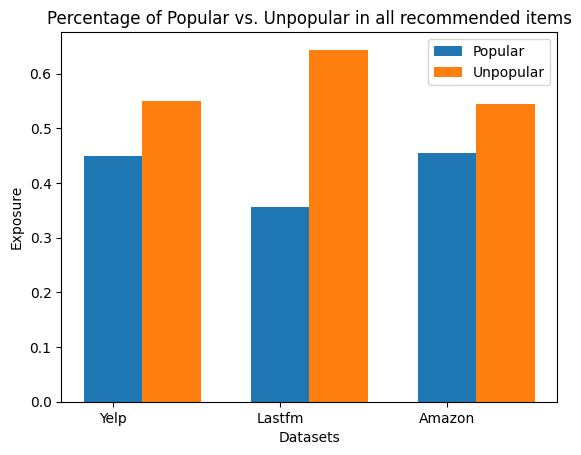

In [ ]:
print("yelp:")
pop_exposure_yelp, unpop_exposure_yelp = exposure_bias_conv(conv_results_yelp, popular_items_yelp)
print("lastfm:")
pop_exposure_lastfm, unpop_exposure_lastfm = exposure_bias_conv(conv_results_lastfm, popular_items_lastfm)
print("amazon:")
pop_exposure_amazon, unpop_exposure_amazon = exposure_bias_conv(conv_results_amazon, popular_items_amazon)
# generate_bar_plot([pop_count/len(all_recommended_items), unpop_count/len(all_recommended_items)],
#                   "Percentage of popular vs. unpopular item in all recommended items",
#                   ["popular", "unpopular"], "Item group", "Exposure")

group_barplot(popular_data=[pop_exposure_yelp, pop_exposure_lastfm, pop_exposure_amazon],
              unpopular_data=[unpop_exposure_yelp, unpop_exposure_lastfm, unpop_exposure_amazon],
              ylabel="Exposure", title="Percentage of Popular vs. Unpopular in all recommended items", xlabel="Datasets")

## Traditional

In [ ]:
import ast
import math

def get_all_trad_recommended_items(trad_results):
  print("generating all recommended items ...")
  print(len(trad_results))
  all_recommended_items = []
  for eachrow in tqdm(trad_results.itertuples(index=False)):
    gold_list = eachrow.gold_list
    recommended_list = eachrow.recommended_list
    all_recommended_items = all_recommended_items + (len(gold_list) * recommended_list)
  return all_recommended_items

In [ ]:
from tqdm import tqdm

def exposure_bias_trad(trad_results, popular_items):
  pop_count = 0
  unpop_count = 0
  all_interactions = 0
  for eachrow in tqdm(trad_results.itertuples(index=False)):
    gold_list = eachrow.gold_list
    gold_len = len(gold_list)
    recommended_list = eachrow.recommended_list
    all_interactions += (len(recommended_list) * gold_len)
    for each_item in recommended_list:
      if str(each_item) in popular_items:
        pop_count += (1 * gold_len)
      else:
        unpop_count += (1 * gold_len)
  print(f"popular expopsure: {pop_count/all_interactions}")
  print(f"unpopular expopsure: {unpop_count/all_interactions}")
  return pop_count/all_interactions, unpop_count/all_interactions

  # all_recommended_items = get_all_trad_recommended_items(trad_results)
  # for each_item in tqdm(all_recommended_items):
  #   if str(each_item) in popular_items:
  #     pop_count += 1
  #   else:
  #     unpop_count += 1

  # print(f"popular expopsure: {pop_count/len(all_recommended_items)}")
  # print(f"unpopular expopsure: {unpop_count/len(all_recommended_items)}")
  # return pop_count/len(all_recommended_items), unpop_count/len(all_recommended_items)

yelp:


68864it [00:33, 2059.05it/s]


popular expopsure: 0.9752867412283048
unpopular expopsure: 0.02471325877169512
lastfm:


1801it [00:00, 6717.06it/s]


popular expopsure: 0.8558239133568061
unpopular expopsure: 0.14417608664319395
amazon:


5077it [00:00, 11072.12it/s]


popular expopsure: 0.8773250239693192
unpopular expopsure: 0.12267497603068073


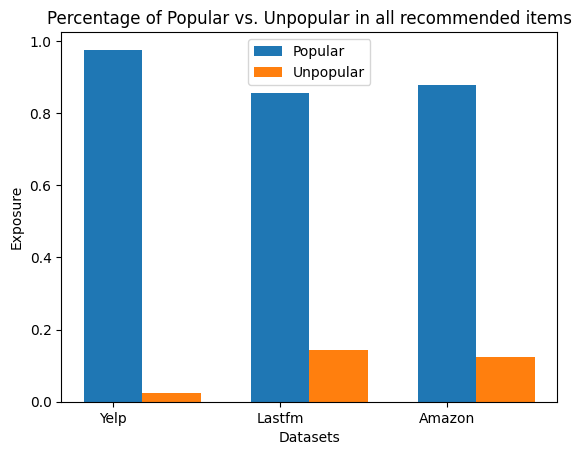

In [ ]:
print("yelp:")
pop_exposure_yelp, unpop_exposure_yelp = exposure_bias_trad(trad_results_yelp, popular_items_yelp)
print("lastfm:")
pop_exposure_lastfm, unpop_exposure_lastfm = exposure_bias_trad(trad_results_lastfm, popular_items_lastfm)
print("amazon:")
pop_exposure_amazon, unpop_exposure_amazon = exposure_bias_trad(trad_results_amazon, popular_items_amazon)

group_barplot(popular_data=[pop_exposure_yelp, pop_exposure_lastfm, pop_exposure_amazon],
              unpopular_data=[unpop_exposure_yelp, unpop_exposure_lastfm, unpop_exposure_amazon],
              ylabel="Exposure", title="Percentage of Popular vs. Unpopular in all recommended items", xlabel="Datasets")

# generate_bar_plot([pop_count/len(all_recommended_items), unpop_count/len(all_recommended_items)],
#                   "Percentage of popular vs. unpopular item in all recommended items",
#                   ["popular", "unpopular"], "Item group", "Exposure")

# Success rate of popular vs. unpopular

## CRS

In [135]:
string_x = "x"

def success_rate_conv(conv_results, popular_items):
  popular_success = 0
  unpopular_success = 0
  all_popular_interactions = 0
  all_unpopular_interactions = 0
  for eachrow in conv_results.itertuples(index=False):
    item_id = str(eachrow.business_id)
    recommended_list = eachrow.recommended_list
    if type(recommended_list) != type(string_x):
      if item_id in popular_items:
        all_popular_interactions += 1
      else:
        all_unpopular_interactions += 1
      continue

    if item_id in recommended_list:
    # Success
      if item_id in popular_items:
        popular_success += 1
        all_popular_interactions += 1
      else:
        unpopular_success += 1
        all_unpopular_interactions += 1
    else:
    # Failure
      if item_id in popular_items:
        all_popular_interactions += 1
      else:
        all_unpopular_interactions += 1

  print(f"Success rate on popular items: {popular_success/all_popular_interactions}")
  print(f"Success rate on unpopular items: {unpopular_success/all_unpopular_interactions}")
  return popular_success/all_popular_interactions, unpopular_success/all_unpopular_interactions

In [136]:
print("yelp:")
pop_success_rate_yelp, unpop_success_rate_yelp = success_rate_conv(conv_results_yelp, popular_items_yelp)
print("lastfm:")
pop_success_rate_lastfm, unpop_success_rate_lastfm = success_rate_conv(conv_results_lastfm, popular_items_lastfm)
print("amazon:")
pop_success_rate_amazon, unpop_success_rate_amazon = success_rate_conv(conv_results_amazon, popular_items_amazon)

yelp:
Success rate on popular items: 0.9749247487373093
Success rate on unpopular items: 0.8915712675722166
lastfm:
Success rate on popular items: 0.45899669570441576
Success rate on unpopular items: 0.10761789600967352
amazon:
Success rate on popular items: 0.7197103781174577
Success rate on unpopular items: 0.7341474870831376


In [137]:
import matplotlib.pyplot as plt

def group_barplot(popular_data, unpopular_data, ylabel, title, xlabel="Datasets"):
  # data for the bar plots
  x_labels = ['Yelp', 'Lastfm', 'Amazon'] # labels for the x axis

  # set the width of the bars
  bar_width = 0.08

  # create the figure
  fig, ax = plt.subplots(figsize=(3, 2))

  # create the bar plots
  bar_positions = [0, 0.3, 0.6]
  popular_bars = ax.bar(bar_positions, popular_data, bar_width, label='Popular') #np.arange(len(popular_data))
  unpopular_bars = ax.bar([x+bar_width for x in bar_positions] , unpopular_data, bar_width, label='Unpopular') #np.arange(len(unpopular_data)) + bar_width

  # add labels, titles, and axis ticks
  # ax.set_xlabel(xlabel, fontsize=10)
  ax.set_ylabel(ylabel, fontsize=10)
  # ax.set_title(title)
  ax.set_xticks([x+(bar_width/2) for x in bar_positions]) #np.arange(len(x_labels))+(bar_width/2)
  ax.set_xticklabels(x_labels, fontsize=10)
  plt.xticks(fontsize=10)
  ax.legend(fontsize=8)
  ax.margins(x=0.03)
  # show the plot
  plt.show()
  ax.figure.savefig(f"item_success_rate_crs.png", bbox_inches='tight', dpi=300)

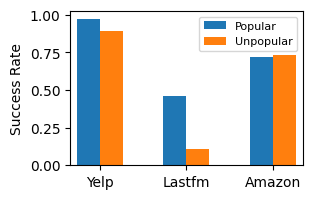

In [138]:
group_barplot(popular_data=[pop_success_rate_yelp, pop_success_rate_lastfm, pop_success_rate_amazon],
              unpopular_data=[unpop_success_rate_yelp, unpop_success_rate_lastfm, unpop_success_rate_amazon],
              ylabel="Success Rate", title="Success rate of popular vs. unpopular", xlabel="Datasets")
# generate_bar_plot([popular_success/all_popular_interactions, unpopular_success/all_unpopular_interactions],
#                   "Success rate of popular vs. unpopular",
#                   ["popular", "unpopular"], "Item group", "Success rate")

## Traditional

In [139]:
import ast

def success_rate_trad(trad_results, popular_items):
  popular_success = 0
  unpopular_success = 0
  all_popular_interactions = 0
  all_unpopular_interactions = 0
  for eachrow in trad_results.itertuples(index=False):
    gold_list = ast.literal_eval(eachrow.gold_list)
    recommended_list = eachrow.recommended_list
    for item_id in gold_list:
      if item_id in recommended_list:
      # Success
        if str(item_id) in popular_items:
          popular_success += 1
          all_popular_interactions += 1
        else:
          unpopular_success += 1
          all_unpopular_interactions += 1
      else:
      # Failure
        if str(item_id) in popular_items:
          all_popular_interactions += 1
        else:
          all_unpopular_interactions += 1

  print(f"Success rate on popular items: {popular_success/all_popular_interactions}")
  print(f"Success rate on unpopular items: {unpopular_success/all_unpopular_interactions}")
  return popular_success/all_popular_interactions, unpopular_success/all_unpopular_interactions

In [140]:
print("yelp:")
pop_success_rate_yelp, unpop_success_rate_yelp = success_rate_trad(trad_results_yelp, popular_items_yelp)
print("lastfm:")
pop_success_rate_lastfm, unpop_success_rate_lastfm = success_rate_trad(trad_results_lastfm, popular_items_lastfm)
print("amazon:")
pop_success_rate_amazon, unpop_success_rate_amazon = success_rate_trad(trad_results_amazon, popular_items_amazon)
# generate_bar_plot([popular_success/all_popular_interactions, unpopular_success/all_unpopular_interactions],
#                   "Success rate of popular vs. unpopular",
#                   ["popular", "unpopular"], "Item group", "Success rate")

yelp:
Success rate on popular items: 0.11337431763685527
Success rate on unpopular items: 0.006376416157541966
lastfm:
Success rate on popular items: 0.11249624511865425
Success rate on unpopular items: 0.0012091898428053204
amazon:
Success rate on popular items: 0.1494770716009654
Success rate on unpopular items: 0.021136683889149837


In [141]:
import matplotlib.pyplot as plt

def group_barplot(popular_data, unpopular_data, ylabel, title, xlabel="Datasets"):
  # data for the bar plots
  x_labels = ['Yelp', 'Lastfm', 'Amazon'] # labels for the x axis

  # set the width of the bars
  bar_width = 0.08

  # create the figure
  fig, ax = plt.subplots(figsize=(3, 2))

  # create the bar plots
  bar_positions = [0, 0.3, 0.6]
  popular_bars = ax.bar(bar_positions, popular_data, bar_width, label='Popular') #np.arange(len(popular_data))
  unpopular_bars = ax.bar([x+bar_width for x in bar_positions] , unpopular_data, bar_width, label='Unpopular') #np.arange(len(unpopular_data)) + bar_width

  # add labels, titles, and axis ticks
  # ax.set_xlabel(xlabel, fontsize=10)
  # ax.set_ylabel(ylabel, fontsize=10)
  # ax.set_title(title)
  ax.set_xticks([x+(bar_width/2) for x in bar_positions]) #np.arange(len(x_labels))+(bar_width/2)
  ax.set_xticklabels(x_labels, fontsize=10)
  plt.xticks(fontsize=10)
  ax.legend(fontsize=8)
  ax.margins(x=0.03)
  # show the plot
  plt.show()
  ax.figure.savefig(f"item_success_rate_trad.png", bbox_inches='tight', dpi=300)

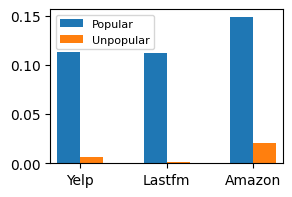

In [142]:
group_barplot(popular_data=[pop_success_rate_yelp, pop_success_rate_lastfm, pop_success_rate_amazon],
              unpopular_data=[unpop_success_rate_yelp, unpop_success_rate_lastfm, unpop_success_rate_amazon],
              ylabel="Success Rate", title="Success rate of popular vs. unpopular", xlabel="Datasets")

# Turn count for popular vs unpopular

In [ ]:
def calculate_average_turn_count(conv_results, popular_items):
  sum_popular_turn_count = 0
  sum_unpopular_turn_count = 0
  all_popular_interactions = 0
  all_unpopular_interactions = 0
  for eachrow in conv_results.itertuples(index=False):
    item_id = str(eachrow.business_id)
    if item_id in popular_items:
      sum_popular_turn_count += eachrow.turn_count
      all_popular_interactions += 1
    else:
      sum_unpopular_turn_count += eachrow.turn_count
      all_unpopular_interactions += 1


  print(f"Avg. turn count on popular items: {sum_popular_turn_count/all_popular_interactions}")
  print(f"Avg. turn count on unpopular items: {sum_unpopular_turn_count/all_unpopular_interactions}")
  return sum_popular_turn_count/all_popular_interactions, sum_unpopular_turn_count/all_unpopular_interactions

yelp:
Avg. turn count on popular items: 5.923052395285954
Avg. turn count on unpopular items: 6.002342962216027
lastfm:
Avg. turn count on popular items: 9.564884349654552
Avg. turn count on unpopular items: 9.02478839177751
amazon:
Avg. turn count on popular items: 6.021560740144811
Avg. turn count on unpopular items: 6.030061061531235


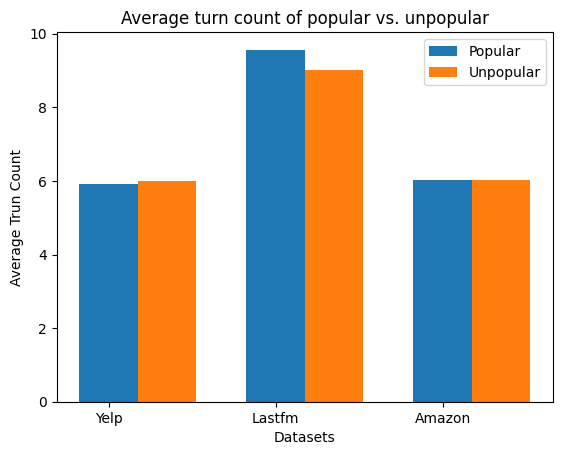

In [ ]:
print("yelp:")
pop_avg_turn_count_yelp, unpop_avg_turn_count_yelp = calculate_average_turn_count(conv_results_yelp, popular_items_yelp)
print("lastfm:")
pop_avg_turn_count_lastfm, unpop_avg_turn_count_lastfm = calculate_average_turn_count(conv_results_lastfm, popular_items_lastfm)
print("amazon:")
pop_avg_turn_count_amazon, unpop_avg_turn_count_amazon = calculate_average_turn_count(conv_results_amazon, popular_items_amazon)

group_barplot(popular_data=[pop_avg_turn_count_yelp, pop_avg_turn_count_lastfm, pop_avg_turn_count_amazon],
              unpopular_data=[unpop_avg_turn_count_yelp, unpop_avg_turn_count_lastfm, unpop_avg_turn_count_amazon],
              ylabel="Average Trun Count", title="Average turn count of popular vs. unpopular", xlabel="Datasets")

In [ ]:
# generate_bar_plot([sum_popular_turn_count/all_popular_interactions, sum_unpopular_turn_count/all_unpopular_interactions],
#                   "Turn count of popular vs. unpopular",
#                   ["popular", "unpopular"], "Item Group", "Avg. Turn count")

##  Distribution and standard deviation of the turn count - Box plot




In [ ]:
def get_turn_count_dataframe(conv_results, popular_items):
  popular = list()
  unpopular = list()
  for eachrow in conv_results.itertuples(index=False):
    item_id = str(eachrow.business_id)
    if item_id in popular_items:
      popular.append(eachrow.turn_count)
    else:
      unpopular.append(eachrow.turn_count)
  return popular, unpopular

In [ ]:
pop_turn_count_yelp, unpop_turn_count_yelp = get_turn_count_dataframe(conv_results_yelp, popular_items_yelp)
pop_turn_count_lastfm, unpop_turn_count_lastfm = get_turn_count_dataframe(conv_results_lastfm, popular_items_lastfm)
pop_turn_count_amazon, unpop_turn_count_amazon = get_turn_count_dataframe(conv_results_amazon, popular_items_amazon)

In [ ]:
yelp_df = pd.DataFrame.from_dict({'yelp_pop': pop_turn_count_yelp, 'yelp_unpop': unpop_turn_count_yelp}, orient='index').T
lastfm_df = pd.DataFrame.from_dict({'lastfm_pop': pop_turn_count_lastfm, 'lastfm_unpop': unpop_turn_count_lastfm}, orient='index').T
amazon_df = pd.DataFrame.from_dict({'amazon_pop': pop_turn_count_amazon, 'amazon_unpop': unpop_turn_count_amazon}, orient='index').T

In [ ]:
result = pd.concat([yelp_df, lastfm_df, amazon_df], axis=1)
result = pd.concat([yelp_df, amazon_df], axis=1)
print(result.columns)

Index(['yelp_pop', 'yelp_unpop', 'amazon_pop', 'amazon_unpop'], dtype='object')


In [ ]:
result.head(10)

,yelp_pop,yelp_unpop,amazon_pop,amazon_unpop
0,6.0,6.0,6.0,6.0
1,7.0,6.0,6.0,6.0
2,6.0,6.0,6.0,6.0
3,6.0,6.0,6.0,6.0
4,6.0,6.0,6.0,6.0
5,6.0,6.0,6.0,6.0
6,6.0,6.0,6.0,6.0
7,6.0,6.0,6.0,6.0
8,6.0,6.0,6.0,6.0
9,6.0,6.0,6.0,6.0


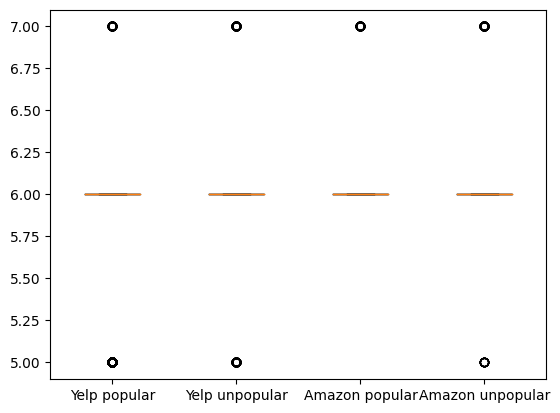

In [ ]:
labels = ['Yelp popular', 'Yelp unpopular', 'Amazon popular', 'Amazon unpopular']
_=plt.boxplot(result.dropna().values, whis=20)
_=plt.xticks(range(1,5),labels)
# plt.savefig('3.png') #dropping the nan's and plot by plt

#  Average rank in popular vs. unpopular

In [ ]:
def calculate_average_rank(trad_results, popular_items):
  sum_popular_rank = 0
  sum_unpopular_rank = 0
  all_popular_interactions = 0
  all_unpopular_interactions = 0
  for eachrow in trad_results.itertuples(index=False):
    recommended_list = eachrow.recommended_list
    for item_id in recommended_list:
      if str(item_id) in popular_items:
        sum_popular_rank += (recommended_list.index(item_id) +1)
        all_popular_interactions += 1
      else:
        sum_unpopular_rank += (recommended_list.index(item_id) +1)
        all_unpopular_interactions += 1

  print(f"Avg. rank in popular items: {sum_popular_rank/all_popular_interactions}")
  print(f"Avg. rank in unpopular items: {sum_unpopular_rank/all_unpopular_interactions}")
  return sum_popular_rank/all_popular_interactions, sum_unpopular_rank/all_unpopular_interactions

yelp:
Avg. rank in popular items: 5.478945488106225
Avg. rank in unpopular items: 6.3389086595492286
lastfm:
Avg. rank in popular items: 5.504699496955255
Avg. rank in unpopular items: 5.475534114403859
amazon:
Avg. rank in popular items: 5.458289861646632
Avg. rank in unpopular items: 5.775299401197604


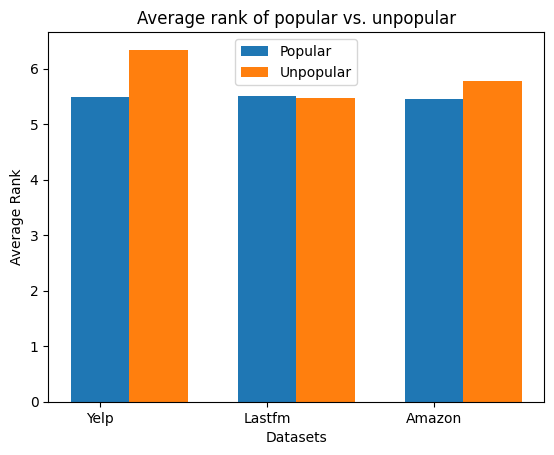

In [ ]:
print("yelp:")
pop_avg_rank_yelp, unpop_avg_rank_yelp = calculate_average_rank(trad_results_yelp, popular_items_yelp)
print("lastfm:")
pop_avg_rank_lastfm, unpop_avg_rank_lastfm = calculate_average_rank(trad_results_lastfm, popular_items_lastfm)
print("amazon:")
pop_avg_rank_amazon, unpop_avg_rank_amazon = calculate_average_rank(trad_results_amazon, popular_items_amazon)

group_barplot(popular_data=[pop_avg_rank_yelp, pop_avg_rank_lastfm, pop_avg_rank_amazon],
              unpopular_data=[unpop_avg_rank_yelp, unpop_avg_rank_lastfm, unpop_avg_rank_amazon],
              ylabel="Average Rank", title="Average rank of popular vs. unpopular", xlabel="Datasets")

## Successful recommendation/ relevant items turn count and average rank

In [ ]:
# generate_bar_plot([sum_popular_rank/all_popular_interactions, sum_unpopular_rank/all_unpopular_interactions],
#                   "Avg. rank in popular vs. unpopular items",
#                   ["popular", "unpopular"], "Item Group", "Avg. Rank")

# Consumer group accuracy

## CRS

In [143]:
def success_rate_conv_per_user_group(conv_results, best_seller, diverse, niche):
  string_x = "x"

  diverse_success = 0
  niche_success = 0
  best_seller_success = 0

  all_diverse_interactions = 0
  all_niche_interactions = 0
  all_best_seller_interactions = 0

  for eachrow in conv_results.itertuples(index=False):
    item_id = str(eachrow.business_id)
    user_id = str(eachrow.user_id)
    recommended_list = eachrow.recommended_list
    if type(recommended_list) != type(string_x):
      if user_id in best_seller:
        all_best_seller_interactions += 1
      elif user_id in diverse:
        all_diverse_interactions += 1
      else:
        all_niche_interactions += 1
      continue

    if item_id in recommended_list:
    # Success
      if user_id in best_seller:
        best_seller_success += 1
        all_best_seller_interactions += 1
      elif user_id in diverse:
        diverse_success += 1
        all_diverse_interactions += 1
      else:
        niche_success += 1
        all_niche_interactions += 1
    else:
    # Failure
      if user_id in best_seller:
        all_best_seller_interactions += 1
      elif user_id in diverse:
        all_diverse_interactions += 1
      else:
        all_niche_interactions += 1

  print(f"Best-seller success rate: {best_seller_success/all_best_seller_interactions}")
  print(f"Diverse success rate: {diverse_success/all_diverse_interactions}")
  print(f"Niche success rate: {niche_success/all_niche_interactions}")
  return best_seller_success/all_best_seller_interactions, diverse_success/all_diverse_interactions, niche_success/all_niche_interactions

In [144]:
import matplotlib.pyplot as plt

def group_barplot_3(best_seller_data, diverse_data, niche_data, ylabel, title, xlabel="Datasets"):
  # data for the bar plots
  x_labels = ['Yelp', 'Lastfm', 'Amazon'] # labels for the x axis

  # set the width of the bars
  bar_width = 0.08

  # create the figure
  fig, ax = plt.subplots(figsize=(3, 2))

  # create the bar plots
  r1 = [0, 0.3, 0.6]#np.arange(len(best_seller_data))
  best_seller_bars = ax.bar(r1, best_seller_data, bar_width, label='Best-seller')
  r2 = [x + bar_width for x in r1]
  diverse_bars = ax.bar(r2, diverse_data, bar_width, label='Diverse')
  r3 = [x + bar_width for x in r2]
  niche_bars = ax.bar(r3, niche_data, bar_width, label='Niche')

  # add labels, titles, and axis ticks
  # ax.set_xlabel(xlabel, fontsize=10)
  plt.yticks(fontsize=9)
  # ax.set_ylabel(ylabel, fontsize=10)
  # ax.set_title(title)
  # ax.set_xticks(np.arange(len(x_labels)))
  ax.set_xticks([r + bar_width for r in r1])
  # plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
  ax.set_xticklabels(x_labels, fontsize=9)

  ax.legend(fontsize=6)
  ax.margins(x=0.03)
  # show the plot
  plt.show()
  ax.figure.savefig(f"user_success_rate_crs.png", bbox_inches='tight', dpi=300)

In [145]:
print("yelp:")
best_seller_success_rate_yelp, diverse_success_rate_yelp, niche_success_rate_yelp = success_rate_conv_per_user_group(conv_results_yelp, best_seller_yelp, diverse_yelp, niche_yelp)
print("lastfm:")
best_seller_success_rate_lastfm, diverse_success_rate_lastfm, niche_success_rate_lastfm = success_rate_conv_per_user_group(conv_results_lastfm, best_seller_lastfm, diverse_lastfm, niche_lastfm)
print("amazon:")
best_seller_success_rate_amazon, udiverse_success_rate_amazon, niche_success_rate_amazon = success_rate_conv_per_user_group(conv_results_amazon, best_seller_amazon, diverse_amazon, niche_amazon)

yelp:
Best-seller success rate: 0.9751717878905743
Diverse success rate: 0.9676675912154467
Niche success rate: 0.8719238613188307
lastfm:
Best-seller success rate: 0.4923943661971831
Diverse success rate: 0.39404691504041
Niche success rate: 0.2465846994535519
amazon:
Best-seller success rate: 0.7031125299281724
Diverse success rate: 0.7297344821522771
Niche success rate: 0.7158119658119658


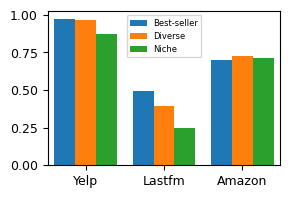

In [146]:
group_barplot_3(best_seller_data=[best_seller_success_rate_yelp, best_seller_success_rate_lastfm, best_seller_success_rate_amazon],
              diverse_data=[diverse_success_rate_yelp, diverse_success_rate_lastfm, udiverse_success_rate_amazon],
              niche_data=[niche_success_rate_yelp, niche_success_rate_lastfm, niche_success_rate_amazon],
              ylabel="Success Rate", title="Success rate of different user groups", xlabel="Datasets")
# generate_bar_plot([popular_success/all_popular_interactions, unpopular_success/all_unpopular_interactions],
#                   "Success rate of popular vs. unpopular",
#                   ["popular", "unpopular"], "Item group", "Success rate")

In [ ]:
# generate_bar_plot([best_seller_success/all_best_seller_interactions, diverse_success/all_diverse_interactions, niche_success/all_niche_interactions],
#                   "Consumer group accuracy", ["Best-seller", "Diverse", "Niche"], "User group", "Success rate")

## Traditional

In [147]:
import ast

def success_rate_trad_per_user_group(trad_results, best_seller, diverse, niche):
  string_x = "x"

  diverse_success = 0
  niche_success = 0
  best_seller_success = 0

  all_diverse_interactions = 0
  all_niche_interactions = 0
  all_best_seller_interactions = 0

  for eachrow in trad_results.itertuples(index=False):
    gold_list = ast.literal_eval(eachrow.gold_list)
    user_id = str(eachrow.user_id)
    recommended_list = eachrow.recommended_list
    for item_id in gold_list:
      if item_id in recommended_list:
      # Success
        if user_id in best_seller:
          best_seller_success += 1
          all_best_seller_interactions += 1
        elif user_id in diverse:
          diverse_success += 1
          all_diverse_interactions += 1
        else:
          niche_success += 1
          all_niche_interactions += 1
      else:
      # Failure
        if user_id in best_seller:
          all_best_seller_interactions += 1
        elif user_id in diverse:
          all_diverse_interactions += 1
        else:
          all_niche_interactions += 1

  print(f"Best-seller success rate: {best_seller_success/all_best_seller_interactions}")
  print(f"Diverse success rate: {diverse_success/all_diverse_interactions}")
  print(f"Niche success rate: {niche_success/all_niche_interactions}")
  return best_seller_success/all_best_seller_interactions, diverse_success/all_diverse_interactions, niche_success/all_niche_interactions

In [148]:
print("yelp:")
best_seller_success_rate_yelp, diverse_success_rate_yelp, niche_success_rate_yelp = success_rate_trad_per_user_group(trad_results_yelp, best_seller_yelp, diverse_yelp, niche_yelp)
print("lastfm:")
best_seller_success_rate_lastfm, diverse_success_rate_lastfm, niche_success_rate_lastfm = success_rate_trad_per_user_group(trad_results_lastfm, best_seller_lastfm, diverse_lastfm, niche_lastfm)
print("amazon:")
best_seller_success_rate_amazon, udiverse_success_rate_amazon, niche_success_rate_amazon = success_rate_trad_per_user_group(trad_results_amazon, best_seller_amazon, diverse_amazon, niche_amazon)
# generate_bar_plot([popular_success/all_popular_interactions, unpopular_success/all_unpopular_interactions],
#                   "Success rate of popular vs. unpopular",
#                   ["popular", "unpopular"], "Item group", "Success rate")

yelp:
Best-seller success rate: 0.13289251912355762
Diverse success rate: 0.07904222106095322
Niche success rate: 0.052345343303874914
lastfm:
Best-seller success rate: 0.14253521126760563
Diverse success rate: 0.09087325054208555
Niche success rate: 0.025273224043715847
amazon:
Best-seller success rate: 0.21308858739026337
Diverse success rate: 0.11271320555653244
Niche success rate: 0.04700854700854701


In [149]:
import matplotlib.pyplot as plt

def group_barplot_3(best_seller_data, diverse_data, niche_data, ylabel, title, xlabel="Datasets"):
  # data for the bar plots
  x_labels = ['Yelp', 'Lastfm', 'Amazon'] # labels for the x axis

  # set the width of the bars
  bar_width = 0.08

  # create the figure
  fig, ax = plt.subplots(figsize=(3, 2))

  # create the bar plots
  r1 = [0, 0.3, 0.6]#np.arange(len(best_seller_data))
  best_seller_bars = ax.bar(r1, best_seller_data, bar_width, label='Best-seller')
  r2 = [x + bar_width for x in r1]
  diverse_bars = ax.bar(r2, diverse_data, bar_width, label='Diverse')
  r3 = [x + bar_width for x in r2]
  niche_bars = ax.bar(r3, niche_data, bar_width, label='Niche')

  # add labels, titles, and axis ticks
  # ax.set_xlabel(xlabel, fontsize=10)
  plt.yticks(fontsize=9)
  # ax.set_ylabel(ylabel, fontsize=10)
  # ax.set_title(title)
  # ax.set_xticks(np.arange(len(x_labels)))
  ax.set_xticks([r + bar_width for r in r1])
  # plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
  ax.set_xticklabels(x_labels, fontsize=9)

  ax.legend(fontsize=6)
  ax.margins(x=0.03)
  # show the plot
  plt.show()
  ax.figure.savefig(f"user_success_rate_trad.png", bbox_inches='tight', dpi=300)

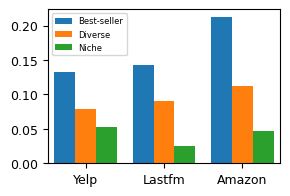

In [150]:
group_barplot_3(best_seller_data=[best_seller_success_rate_yelp, best_seller_success_rate_lastfm, best_seller_success_rate_amazon],
              diverse_data=[diverse_success_rate_yelp, diverse_success_rate_lastfm, udiverse_success_rate_amazon],
              niche_data=[niche_success_rate_yelp, niche_success_rate_lastfm, niche_success_rate_amazon],
              ylabel="Success Rate", title="Success rate of different user groups", xlabel="Datasets")

In [ ]:
# generate_bar_plot([best_seller_success/all_best_seller_interactions, diverse_success/all_diverse_interactions, niche_success/all_niche_interactions],
                  # "Consumer group accuracy", ["Best-seller", "Diverse", "Niche"], "User group", "Success rate")

# per user group popularity exposure vs. popularity in profile

In [ ]:
yelp_train_data = pd.read_csv(f"{base_path}/{domain_yelp}/data/train_ratings_filter.csv")
lastfm_train_data = pd.read_csv(f"{base_path}/{domain_lastfm}/data/train_ratings_filter.csv")
amazon_train_data = pd.read_csv(f"{base_path}/{domain_amazon}/data/train_ratings_filter.csv")

In [ ]:
amazon_train_data.columns

Index(['business_id', 'user_id', 'stars', 'timestamp'], dtype='object')

In [ ]:
def calculate_average_item_popularity_in_profile(train_data, popular_items, best_seller, diverse, niche):
  best_seller_pop_count_profile = 0
  diverse_pop_count_profile = 0
  niche_pop_count_profile = 0

  all_best_seller_interactions = 0
  all_diverse_interactions = 0
  all_niche_interactions = 0
  grouped_train_data = train_data.groupby("user_id")
  for user_id, grouped in grouped_train_data:
    for eachrow in grouped.itertuples(index=False):
      if str(eachrow.business_id) in popular_items:
        if str(user_id) in best_seller:
          best_seller_pop_count_profile += 1
          all_best_seller_interactions += 1
        elif str(user_id) in diverse:
          diverse_pop_count_profile += 1
          all_diverse_interactions += 1
        elif str(user_id) in niche:
          niche_pop_count_profile += 1
          all_niche_interactions += 1
      else:
        if str(user_id) in best_seller:
          all_best_seller_interactions += 1
        elif str(user_id) in diverse:
          all_diverse_interactions += 1
        elif str(user_id) in niche:
          all_niche_interactions += 1

  print(f"Best-seller user group popularity in profile: {best_seller_pop_count_profile/all_best_seller_interactions}")
  print(f"Diverse user group popularity in profile: {diverse_pop_count_profile/all_diverse_interactions}")
  print(f"Niche user group popularity in profile: {niche_pop_count_profile/all_niche_interactions}")
  return round(best_seller_pop_count_profile/all_best_seller_interactions, 2), round(diverse_pop_count_profile/all_diverse_interactions, 2), round(niche_pop_count_profile/all_niche_interactions, 2)

## CRS

In [ ]:
import ast

def calculate_average_item_popularity_in_recommended_list_conv(conv_results, popular_items, best_seller, diverse, niche):
  string_x = "x"

  best_seller_pop_count_recommended_list = 0
  diverse_pop_count_recommended_list = 0
  niche_pop_count_recommended_list = 0

  all_best_seller_recommended_items = 0
  all_diverse_recommended_items = 0
  all_niche_recommended_items = 0
  grouped_conv_results = conv_results.groupby("user_id")
  for user_id, grouped in grouped_conv_results:
    for eachrow in grouped.itertuples(index=False):
      if type(eachrow.recommended_list) != type(string_x):
        continue
      recommended_list = ast.literal_eval(eachrow.recommended_list)
      for each_item in recommended_list:
        if each_item in popular_items:
          if str(user_id) in best_seller:
            best_seller_pop_count_recommended_list += 1
            all_best_seller_recommended_items += 1
          elif str(user_id) in diverse:
            diverse_pop_count_recommended_list += 1
            all_diverse_recommended_items += 1
          elif str(user_id) in niche:
            niche_pop_count_recommended_list += 1
            all_niche_recommended_items += 1
        else:
          if str(user_id) in best_seller:
            all_best_seller_recommended_items += 1
          elif str(user_id) in diverse:
            all_diverse_recommended_items += 1
          elif str(user_id) in niche:
            all_niche_recommended_items += 1

  print(f"Best-seller user group popularity in recommended list: {best_seller_pop_count_recommended_list/all_best_seller_recommended_items}")
  print(f"Diverse user group popularity in recommended list: {diverse_pop_count_recommended_list/all_diverse_recommended_items}")
  print(f"Niche user group popularity in recommended list: {niche_pop_count_recommended_list/all_niche_recommended_items}")
  return round(best_seller_pop_count_recommended_list/all_best_seller_recommended_items, 2), round(diverse_pop_count_recommended_list/all_diverse_recommended_items, 2), round(niche_pop_count_recommended_list/all_niche_recommended_items, 2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def generate_barplot_for_comparing_conv_and_profile(train_data, conv_results, popular_items, best_seller, diverse, niche):
  # Define the data for each group
  print("calculuating item popularity for each user group in the training data.")
  best_seller_profile, diverse_profile, niche_profile = calculate_average_item_popularity_in_profile(train_data, popular_items, best_seller, diverse, niche)
  print("calculuating item popularity for each user group in the recommended lists.")
  best_seller_conv, diverse_conv, niche_conv = calculate_average_item_popularity_in_recommended_list_conv(conv_results, popular_items, best_seller, diverse, niche)
  best_seller_group = [best_seller_profile, best_seller_conv]
  diverse_group = [diverse_profile, diverse_conv]
  niche_group = [niche_profile, niche_conv]

  # Define the x-axis labels and positions
  labels = ['Profile', 'Recommended list']
  x_positions = np.arange(len(labels))

  # Define the width of each bar
  bar_width = 0.25

  # Create the figure and axis objects
  fig, ax = plt.subplots()

  # Plot the bars for each group
  rects1 = ax.bar(x_positions - bar_width, best_seller_group, bar_width, label='Best-seller')
  rects2 = ax.bar(x_positions, diverse_group, bar_width, label='Diverse')
  rects3 = ax.bar(x_positions + bar_width, niche_group, bar_width, label='Niche')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  # ax.set_xlabel('Values')
  ax.set_ylabel('popular items ratio')
  ax.set_title('Per user group popularity exposure vs. popularity in profile')
  ax.set_xticks(x_positions)
  ax.set_xticklabels(labels)
  ax.legend()

  # Add values above each bar
  def autolabel(rects):
    """Attach a text label above each bar displaying its height"""
    for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points", ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)

  plt.show()

calculuating item popularity for each user group in the training data.
1.0 0.75 0.32
calculuating item popularity for each user group in the recommended lists.
Best-seller user group popularity in recommended list: 0.6232327628567819
Diverse user group popularity in recommended list: 0.4669513587301204
Niche user group popularity in recommended list: 0.2333018502373341


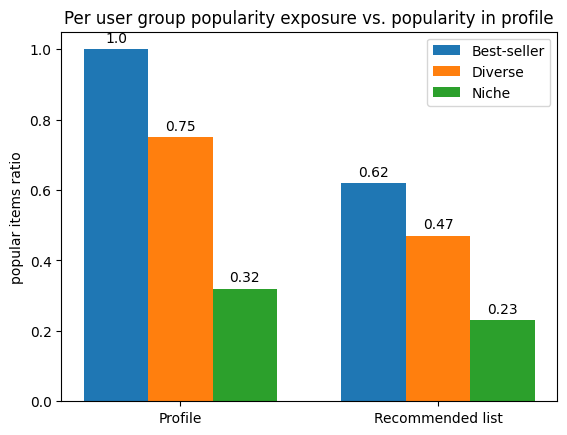

In [ ]:
generate_barplot_for_comparing_conv_and_profile(yelp_train_data, conv_results_yelp, popular_items_yelp, best_seller_yelp, diverse_yelp, niche_yelp)

calculuating item popularity for each user group in the training data.
Best-seller user group popularity in profile: 0.9626984126984127
Diverse user group popularity in profile: 0.8145499916020826
Niche user group popularity in profile: 0.5204592541436464
calculuating item popularity for each user group in the recommended lists.
Best-seller user group popularity in recommended list: 0.4581321049112118
Diverse user group popularity in recommended list: 0.36431945040790037
Niche user group popularity in recommended list: 0.22696155871511323


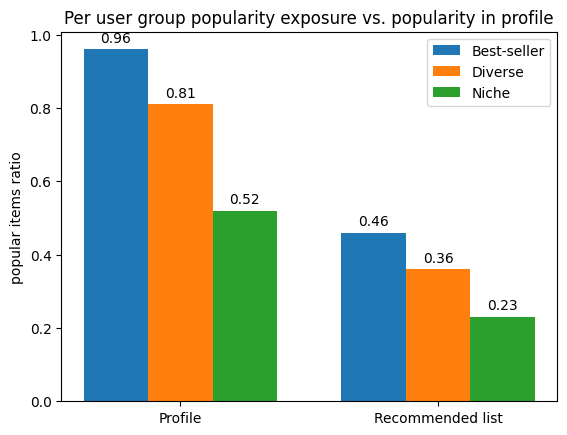

In [ ]:
generate_barplot_for_comparing_conv_and_profile(lastfm_train_data, conv_results_lastfm, popular_items_lastfm, best_seller_lastfm, diverse_lastfm, niche_lastfm)

calculuating item popularity for each user group in the training data.
Best-seller user group popularity in profile: 1.0
Diverse user group popularity in profile: 0.7825172197871008
Niche user group popularity in profile: 0.34822413412750935
calculuating item popularity for each user group in the recommended lists.
Best-seller user group popularity in recommended list: 0.5301984469370147
Diverse user group popularity in recommended list: 0.4680035828025478
Niche user group popularity in recommended list: 0.3288364249578415


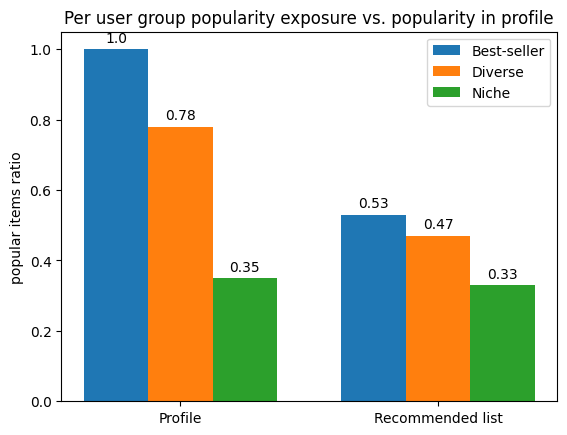

In [ ]:
generate_barplot_for_comparing_conv_and_profile(amazon_train_data, conv_results_amazon, popular_items_amazon, best_seller_amazon, diverse_amazon, niche_amazon)

## Traditional

In [ ]:
import ast

def calculate_average_item_popularity_in_recommended_list_trad(trad_results, popular_items, best_seller, diverse, niche):
  string_x = "x"

  best_seller_pop_count_recommended_list = 0
  diverse_pop_count_recommended_list = 0
  niche_pop_count_recommended_list = 0

  all_best_seller_recommended_items = 0
  all_diverse_recommended_items = 0
  all_niche_recommended_items = 0

  for eachrow in trad_results.itertuples(index=False):
    for i in range(len(ast.literal_eval(eachrow.gold_list))):
      user_id = eachrow.user_id
      recommended_list = eachrow.recommended_list
      for each_item in recommended_list:
        if str(each_item) in popular_items:
          if str(user_id) in best_seller:
            best_seller_pop_count_recommended_list += 1
            all_best_seller_recommended_items += 1
          elif str(user_id) in diverse:
            diverse_pop_count_recommended_list += 1
            all_diverse_recommended_items += 1
          elif str(user_id) in niche:
            niche_pop_count_recommended_list += 1
            all_niche_recommended_items += 1
        else:
          if str(user_id) in best_seller:
            all_best_seller_recommended_items += 1
          elif str(user_id) in diverse:
            all_diverse_recommended_items += 1
          elif str(user_id) in niche:
            all_niche_recommended_items += 1

  print(f"Best-seller user group popularity in recommended list: {best_seller_pop_count_recommended_list/all_best_seller_recommended_items}")
  print(f"Diverse user group popularity in recommended list: {diverse_pop_count_recommended_list/all_diverse_recommended_items}")
  print(f"Niche user group popularity in recommended list: {niche_pop_count_recommended_list/all_niche_recommended_items}")

  return round(best_seller_pop_count_recommended_list/all_best_seller_recommended_items, 2), round(diverse_pop_count_recommended_list/all_diverse_recommended_items, 2), round(niche_pop_count_recommended_list/all_niche_recommended_items, 2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def generate_barplot_for_comparing_trad_and_profile(train_data, trad_results, popular_items, best_seller, diverse, niche):
  # Define the data for each group
  print("calculuating item popularity for each user group in the training data.")
  best_seller_profile, diverse_profile, niche_profile = calculate_average_item_popularity_in_profile(train_data, popular_items, best_seller, diverse, niche)
  print("calculuating item popularity for each user group in the recommended lists.")
  best_seller_trad, diverse_trad, niche_trad = calculate_average_item_popularity_in_recommended_list_trad(trad_results, popular_items, best_seller, diverse, niche)
  best_seller_group = [best_seller_profile, best_seller_trad]
  diverse_group = [diverse_profile, diverse_trad]
  niche_group = [niche_profile, niche_trad]

  # Define the x-axis labels and positions
  labels = ['Profile', 'Recommended list']
  x_positions = np.arange(len(labels))

  # Define the width of each bar
  bar_width = 0.25

  # Create the figure and axis objects
  fig, ax = plt.subplots()

  # Plot the bars for each group
  rects1 = ax.bar(x_positions - bar_width, best_seller_group, bar_width, label='Best-seller')
  rects2 = ax.bar(x_positions, diverse_group, bar_width, label='Diverse')
  rects3 = ax.bar(x_positions + bar_width, niche_group, bar_width, label='Niche')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  # ax.set_xlabel('Values')
  ax.set_ylabel('popular items ratio')
  ax.set_title('Per user group popularity exposure vs. popularity in profile')
  ax.set_xticks(x_positions)
  ax.set_xticklabels(labels)
  ax.legend()

  # Add values above each bar
  def autolabel(rects):
    """Attach a text label above each bar displaying its height"""
    for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points", ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)

  plt.show()


calculuating item popularity for each user group in the training data.
Best-seller user group popularity in profile: 0.9997123233485562
Diverse user group popularity in profile: 0.7512514271531398
Niche user group popularity in profile: 0.32269603029877963
calculuating item popularity for each user group in the recommended lists.
Best-seller user group popularity in recommended list: 0.9998379359522883
Diverse user group popularity in recommended list: 0.9949511597057523
Niche user group popularity in recommended list: 0.891611148878314


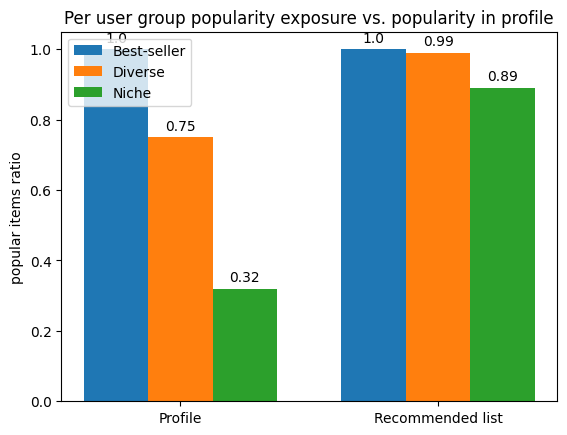

In [ ]:
generate_barplot_for_comparing_trad_and_profile(yelp_train_data, trad_results_yelp, popular_items_yelp, best_seller_yelp, diverse_yelp, niche_yelp)

calculuating item popularity for each user group in the training data.
Best-seller user group popularity in profile: 0.9626984126984127
Diverse user group popularity in profile: 0.8145499916020826
Niche user group popularity in profile: 0.5204592541436464
calculuating item popularity for each user group in the recommended lists.
Best-seller user group popularity in recommended list: 1.0
Diverse user group popularity in recommended list: 0.9237532032328011
Niche user group popularity in recommended list: 0.4437841530054645


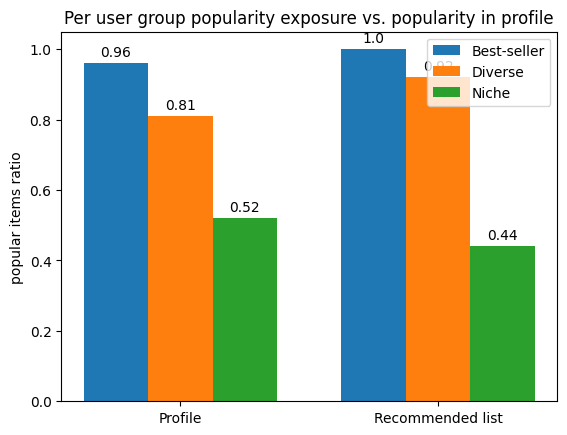

In [ ]:
generate_barplot_for_comparing_trad_and_profile(lastfm_train_data, trad_results_lastfm, popular_items_lastfm, best_seller_lastfm, diverse_lastfm, niche_lastfm)

calculuating item popularity for each user group in the training data.
Best-seller user group popularity in profile: 1.0
Diverse user group popularity in profile: 0.7825172197871008
Niche user group popularity in profile: 0.34822413412750935
calculuating item popularity for each user group in the recommended lists.
Best-seller user group popularity in recommended list: 0.9923383878691141
Diverse user group popularity in recommended list: 0.9375417619131352
Niche user group popularity in recommended list: 0.5307692307692308


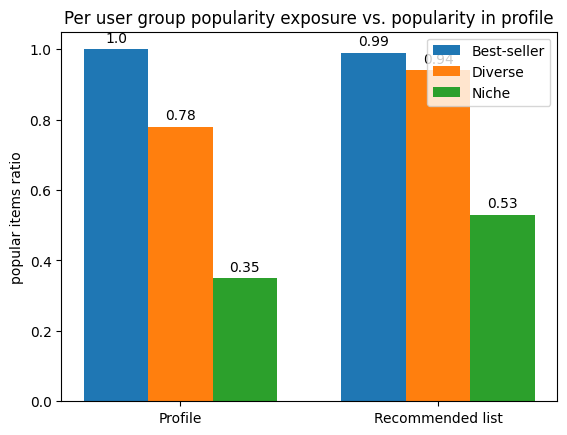

In [ ]:
generate_barplot_for_comparing_trad_and_profile(amazon_train_data, trad_results_amazon, popular_items_amazon, best_seller_amazon, diverse_amazon, niche_amazon)

# Turn count per user group

In [ ]:
def calculate_average_turn_count_per_user_group(conv_results, best_seller, diverse, niche):
  sum_best_seller_turn_count = 0
  sum_diverse_turn_count = 0
  sum_niche_turn_count = 0

  all_best_seller_interactions = 0
  all_diverse_interactions = 0
  all_niche_interactions = 0
  for eachrow in conv_results.itertuples(index=False):
    user_id = str(eachrow.user_id)
    if user_id in best_seller:
      sum_best_seller_turn_count += eachrow.turn_count
      all_best_seller_interactions += 1
    elif user_id in diverse:
      sum_diverse_turn_count += eachrow.turn_count
      all_diverse_interactions += 1
    else:
      sum_niche_turn_count += eachrow.turn_count
      all_niche_interactions += 1

  print(f"Avg. turn count in best-seller group: {sum_best_seller_turn_count/all_best_seller_interactions}")
  print(f"Avg. turn count in diverse group: {sum_diverse_turn_count/all_diverse_interactions}")
  print(f"Avg. turn count in niche group: {sum_niche_turn_count/all_niche_interactions}")
  return sum_best_seller_turn_count/all_best_seller_interactions, sum_diverse_turn_count/all_diverse_interactions, sum_niche_turn_count/all_niche_interactions

yelp:
Avg. turn count in best-seller group: 5.870478413068845
Avg. turn count in diverse group: 5.939354959735231
Avg. turn count in niche group: 6.025832766825289
lastfm:
Avg. turn count in best-seller group: 9.56450704225352
Avg. turn count in diverse group: 9.481174847230436
Avg. turn count in niche group: 9.245218579234972
amazon:
Avg. turn count in best-seller group: 6.023942537909019
Avg. turn count in diverse group: 6.022683312818709
Avg. turn count in niche group: 6.027777777777778


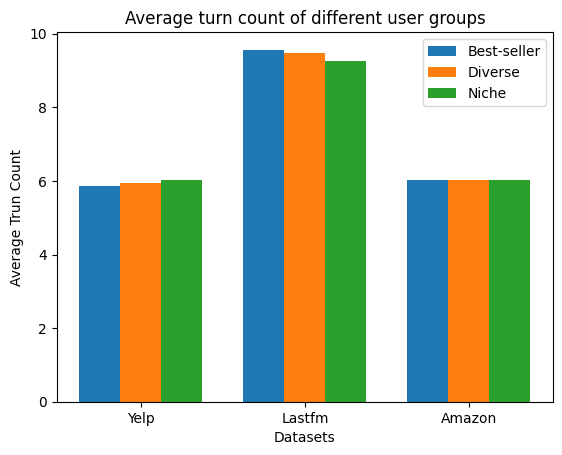

In [ ]:
print("yelp:")
best_seller_average_turn_count_yelp, diverse_average_turn_count_yelp, niche_average_turn_count_yelp = calculate_average_turn_count_per_user_group(conv_results_yelp, best_seller_yelp, diverse_yelp, niche_yelp)
print("lastfm:")
best_seller_average_turn_count_lastfm, diverse_average_turn_count_lastfm, niche_average_turn_count_lastfm = calculate_average_turn_count_per_user_group(conv_results_lastfm, best_seller_lastfm, diverse_lastfm, niche_lastfm)
print("amazon:")
best_seller_average_turn_count_amazon, diverse_average_turn_count_amazon, niche_average_turn_count_amazon = calculate_average_turn_count_per_user_group(conv_results_amazon, best_seller_amazon, diverse_amazon, niche_amazon)

group_barplot_3(best_seller_data=[best_seller_average_turn_count_yelp, best_seller_average_turn_count_lastfm, best_seller_average_turn_count_amazon],
              diverse_data=[diverse_average_turn_count_yelp, diverse_average_turn_count_lastfm, diverse_average_turn_count_amazon],
              niche_data=[niche_average_turn_count_yelp, niche_average_turn_count_lastfm, niche_average_turn_count_amazon],
              ylabel="Average Trun Count", title="Average turn count of different user groups", xlabel="Datasets")
# generate_bar_plot([popular_success/all_popular_interactions, unpopular_success/all_unpopular_interactions],
#                   "Success rate of popular vs. unpopular",
#                   ["popular", "unpopular"], "Item group", "Success rate")

In [ ]:
# generate_bar_plot([sum_best_seller_turn_count/all_best_seller_interactions, sum_diverse_turn_count/all_diverse_interactions, sum_niche_turn_count/all_niche_interactions],
#                   "Turn count per user group", ["Best-seller", "Diverse", "Niche"], "User Group", "Avg. Turn Count")

# Heatmap -> table by removing 0 accuracy users from the traditional model. For Conv create both with 0 accuracy users and without it.